## 1. Import libraries and load the dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [25]:
df = pd.read_csv('./BTC.csv')
df1 = df.reset_index()['Price']

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [27]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


In [28]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1168, 1)
Test shape: (389, 1)
Validate shape: (391, 1)


In [29]:
train_size = int(0.7 * len(df1))
test_size = int(0.15 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (292, 1)
Validate shape: (293, 1)


In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [31]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform GRU Model

### 3.1 Build the GRU Model and fit train data into Model

In [33]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
20/20 [==============================] - 4s 73ms/step - loss: 0.0726 - val_loss: 0.0587
Epoch 2/300
20/20 [==============================] - 1s 47ms/step - loss: 0.0132 - val_loss: 0.0072
Epoch 3/300
20/20 [==============================] - 1s 48ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 4/300
20/20 [==============================] - 1s 48ms/step - loss: 8.0325e-04 - val_loss: 2.9267e-05
Epoch 5/300
20/20 [==============================] - 1s 47ms/step - loss: 7.1902e-04 - val_loss: 1.2484e-05
Epoch 6/300
20/20 [==============================] - 1s 55ms/step - loss: 6.6561e-04 - val_loss: 2.2593e-05
Epoch 7/300
20/20 [==============================] - 1s 50ms/step - loss: 6.4628e-04 - val_loss: 1.8766e-05
Epoch 8/300
20/20 [==============================] - 1s 47ms/step - loss: 6.2230e-04 - val_loss: 1.3867e-05
Epoch 9/300
20/20 [==============================] - 1s 51ms/step - loss: 6.1118e-04 - val_loss: 4.1579e-05
Epoch 10/300
20/20 [==============================] 

20/20 [==============================] - 1s 55ms/step - loss: 3.8944e-04 - val_loss: 8.4679e-06
Epoch 77/300
20/20 [==============================] - 1s 51ms/step - loss: 4.0356e-04 - val_loss: 9.5191e-06
Epoch 78/300
20/20 [==============================] - 1s 49ms/step - loss: 3.8498e-04 - val_loss: 7.2501e-06
Epoch 79/300
20/20 [==============================] - 1s 49ms/step - loss: 3.7817e-04 - val_loss: 1.2547e-05
Epoch 80/300
20/20 [==============================] - 1s 52ms/step - loss: 3.6894e-04 - val_loss: 1.1106e-05
Epoch 81/300
20/20 [==============================] - 1s 48ms/step - loss: 3.6990e-04 - val_loss: 7.0258e-06
Epoch 82/300
20/20 [==============================] - 1s 47ms/step - loss: 3.7608e-04 - val_loss: 5.9572e-06
Epoch 83/300
20/20 [==============================] - 1s 48ms/step - loss: 3.7593e-04 - val_loss: 6.7595e-06
Epoch 84/300
20/20 [==============================] - 1s 48ms/step - loss: 3.6842e-04 - val_loss: 7.2757e-06
Epoch 85/300
20/20 [============

Epoch 151/300
20/20 [==============================] - 1s 48ms/step - loss: 3.7075e-04 - val_loss: 8.0925e-06
Epoch 152/300
20/20 [==============================] - 1s 48ms/step - loss: 3.6572e-04 - val_loss: 5.1143e-06
Epoch 153/300
20/20 [==============================] - 1s 52ms/step - loss: 3.6727e-04 - val_loss: 1.4993e-05
Epoch 154/300
20/20 [==============================] - 1s 51ms/step - loss: 3.5146e-04 - val_loss: 6.6093e-06
Epoch 155/300
20/20 [==============================] - 1s 52ms/step - loss: 3.5291e-04 - val_loss: 6.2054e-06
Epoch 156/300
20/20 [==============================] - 1s 53ms/step - loss: 3.6581e-04 - val_loss: 1.1425e-05
Epoch 157/300
20/20 [==============================] - 1s 48ms/step - loss: 3.9280e-04 - val_loss: 4.7639e-05
Epoch 158/300
20/20 [==============================] - 1s 51ms/step - loss: 3.7478e-04 - val_loss: 2.5558e-05
Epoch 159/300
20/20 [==============================] - 1s 49ms/step - loss: 3.5345e-04 - val_loss: 1.0341e-05
Epoch 160/

20/20 [==============================] - 1s 50ms/step - loss: 3.5383e-04 - val_loss: 4.8820e-06
Epoch 226/300
20/20 [==============================] - 1s 49ms/step - loss: 3.4690e-04 - val_loss: 1.2782e-05
Epoch 227/300
20/20 [==============================] - 1s 48ms/step - loss: 3.5727e-04 - val_loss: 1.5017e-05
Epoch 228/300
20/20 [==============================] - 1s 49ms/step - loss: 3.5133e-04 - val_loss: 4.9045e-06
Epoch 229/300
20/20 [==============================] - 1s 48ms/step - loss: 3.5450e-04 - val_loss: 6.1645e-05
Epoch 230/300
20/20 [==============================] - 1s 57ms/step - loss: 3.5318e-04 - val_loss: 8.2494e-06
Epoch 231/300
20/20 [==============================] - 1s 50ms/step - loss: 3.5061e-04 - val_loss: 7.9985e-06
Epoch 232/300
20/20 [==============================] - 1s 53ms/step - loss: 3.5718e-04 - val_loss: 3.4467e-05
Epoch 233/300
20/20 [==============================] - 1s 54ms/step - loss: 4.1136e-04 - val_loss: 2.6302e-05
Epoch 234/300
20/20 [===

20/20 [==============================] - 1s 55ms/step - loss: 3.6819e-04 - val_loss: 4.4830e-05
Epoch 300/300
20/20 [==============================] - 1s 54ms/step - loss: 3.5733e-04 - val_loss: 5.5750e-06


In [35]:
def evaluate_gru_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [36]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_gru_model(yval, X_val)

6/6 [==============================] - 1s 14ms/step


### 3.3 Evaluate on Test data

In [37]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_gru_model(ytest, X_test)

6/6 [==============================] - 1s 14ms/step


In [38]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

40/40 [==============================] - 1s 13ms/step


### 3.4 Predict price for the next 30 days

In [39]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=232
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.06393081 0.06607858 0.06461822 0.0636602  0.05445169 0.048744
 0.04706279 0.04668021 0.04699747 0.04915147 0.04787773 0.053475
 0.05421685 0.05500535 0.05270672 0.0515994  0.05240656 0.05108617
 0.05273472 0.04880465 0.04930388 0.04641737 0.04128823 0.04550912
 0.04437691 0.04709079 0.04550445 0.04570197 0.04396633 0.05442214
 0.05500379 0.05480161 0.05429461 0.05025879 0.05096642 0.04948118
 0.05316396 0.04795705 0.05178136 0.05687785 0.05515465 0.06667424
 0.06832744 0.06950475 0.06893243 0.06847364 0.06649538 0.06999465
 0.06870848 0.06690752 0.06646895 0.06487484 0.06592617 0.06050775
 0.06435539 0.06427141 0.06608169 0.06787332 0.0666198  0.07429797
 0.0804769  0.08243182 0.07801652 0.07802585 0.07518445 0.07956087
 0.0816231  0.08468846 0.08499017 0.08135093 0.08055466 0.09015664
 0.09471969 0.09281142 0.09646932 0.09996547 0.10303083 0.1007773
 0.1014165  0.09353927 0.09092182 0.09356882 0.09621271 0.09523758
 0.08883781 0.09422046 0.08778336 0.09979284 0.08902288

3 day output [[0.12593639]]
4 day input [0.05445169 0.048744   0.04706279 0.04668021 0.04699747 0.04915147
 0.04787773 0.053475   0.05421685 0.05500535 0.05270672 0.0515994
 0.05240656 0.05108617 0.05273472 0.04880465 0.04930388 0.04641737
 0.04128823 0.04550912 0.04437691 0.04709079 0.04550445 0.04570197
 0.04396633 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879
 0.05096642 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785
 0.05515465 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364
 0.06649538 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484
 0.06592617 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332
 0.0666198  0.07429797 0.0804769  0.08243182 0.07801652 0.07802585
 0.07518445 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093
 0.08055466 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547
 0.10303083 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882
 0.09621271 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284
 0.08902288 0.08675069 

9 day output [[0.13861483]]
10 day input [0.04787773 0.053475   0.05421685 0.05500535 0.05270672 0.0515994
 0.05240656 0.05108617 0.05273472 0.04880465 0.04930388 0.04641737
 0.04128823 0.04550912 0.04437691 0.04709079 0.04550445 0.04570197
 0.04396633 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879
 0.05096642 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785
 0.05515465 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364
 0.06649538 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484
 0.06592617 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332
 0.0666198  0.07429797 0.0804769  0.08243182 0.07801652 0.07802585
 0.07518445 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093
 0.08055466 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547
 0.10303083 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882
 0.09621271 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284
 0.08902288 0.08675069 0.08856098 0.08768849 0.07872726 0.07697918
 0.07278318 0.07529332

15 day output [[0.15302822]]
16 day input [0.05240656 0.05108617 0.05273472 0.04880465 0.04930388 0.04641737
 0.04128823 0.04550912 0.04437691 0.04709079 0.04550445 0.04570197
 0.04396633 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879
 0.05096642 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785
 0.05515465 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364
 0.06649538 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484
 0.06592617 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332
 0.0666198  0.07429797 0.0804769  0.08243182 0.07801652 0.07802585
 0.07518445 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093
 0.08055466 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547
 0.10303083 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882
 0.09621271 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284
 0.08902288 0.08675069 0.08856098 0.08768849 0.07872726 0.07697918
 0.07278318 0.07529332 0.07985947 0.07427309 0.07245347 0.07306312
 0.05806293 0.056394

21 day output [[0.16874075]]
22 day input [0.04128823 0.04550912 0.04437691 0.04709079 0.04550445 0.04570197
 0.04396633 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879
 0.05096642 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785
 0.05515465 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364
 0.06649538 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484
 0.06592617 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332
 0.0666198  0.07429797 0.0804769  0.08243182 0.07801652 0.07802585
 0.07518445 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093
 0.08055466 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547
 0.10303083 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882
 0.09621271 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284
 0.08902288 0.08675069 0.08856098 0.08768849 0.07872726 0.07697918
 0.07278318 0.07529332 0.07985947 0.07427309 0.07245347 0.07306312
 0.05806293 0.05639417 0.05526041 0.05912671 0.05718578 0.05280937
 0.05526196 0.055680

27 day output [[0.18562213]]
28 day input [0.04396633 0.05442214 0.05500379 0.05480161 0.05429461 0.05025879
 0.05096642 0.04948118 0.05316396 0.04795705 0.05178136 0.05687785
 0.05515465 0.06667424 0.06832744 0.06950475 0.06893243 0.06847364
 0.06649538 0.06999465 0.06870848 0.06690752 0.06646895 0.06487484
 0.06592617 0.06050775 0.06435539 0.06427141 0.06608169 0.06787332
 0.0666198  0.07429797 0.0804769  0.08243182 0.07801652 0.07802585
 0.07518445 0.07956087 0.0816231  0.08468846 0.08499017 0.08135093
 0.08055466 0.09015664 0.09471969 0.09281142 0.09646932 0.09996547
 0.10303083 0.1007773  0.1014165  0.09353927 0.09092182 0.09356882
 0.09621271 0.09523758 0.08883781 0.09422046 0.08778336 0.09979284
 0.08902288 0.08675069 0.08856098 0.08768849 0.07872726 0.07697918
 0.07278318 0.07529332 0.07985947 0.07427309 0.07245347 0.07306312
 0.05806293 0.05639417 0.05526041 0.05912671 0.05718578 0.05280937
 0.05526196 0.05568032 0.06524965 0.05971614 0.05593382 0.05769123
 0.05637706 0.060661

## 4.  Evaluate accuracy validate, test data

In [40]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE          MAPE      RMSE
Validate  0.000122  0.007642  6.785912e-02  0.011033
Test      0.000006  0.001736  5.154508e+10  0.002361


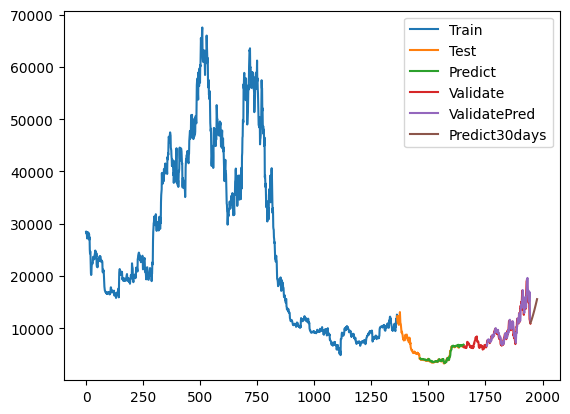

In [41]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()